### Explique cuál es diferencia entre localización de objetos y clasificación de imágenes. Muestre ejemplos con imágenes propias de ello.

Clasificacion de imagenes:

In [1]:
!pip install tensorflow pillow

In [3]:
# Requisitos:
#

import tensorflow as tf
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np

# Cargar el modelo preentrenado EfficientNetB0
model = EfficientNetB0(weights='imagenet')

def classify_image(img_path):
    # Cargar y preparar la imagen
    img = Image.open(img_path)
    img = img.resize((224, 224))  # Tamaño de entrada para EfficientNetB0

    # Convertir la imagen a un array y procesarla
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)

    # Realizar la predicción con el modelo
    predictions = model.predict(img_array)

    # Decodificar y retornar las predicciones
    return decode_predictions(predictions, top=3)[0]



In [9]:
# Prueba con una imagen local
img_path = '/content/apple-single-red.jpg'  # Reemplaza con la ruta de tu imagen
predictions = classify_image(img_path)

print('\n')

# Mostrar las predicciones
for i, (imagenet_id, label, score) in enumerate(predictions):
    print(f"{i + 1}: {label} ({score:.2f})")

1/1 [==============================] - 0s 126ms/step


1: pomegranate (0.25)
2: Granny_Smith (0.20)
3: bell_pepper (0.03)


### Deteccion de objetos

In [11]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 750.4/750.4 kB 6.9 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

100%|██████████| 6.23M/6.23M [00:00<00:00, 24.8MB/s]



0: 448x640 1 apple, 338.1ms
Speed: 25.4ms preprocess, 338.1ms inference, 2596.9ms postprocess per image at shape (1, 3, 448, 640)


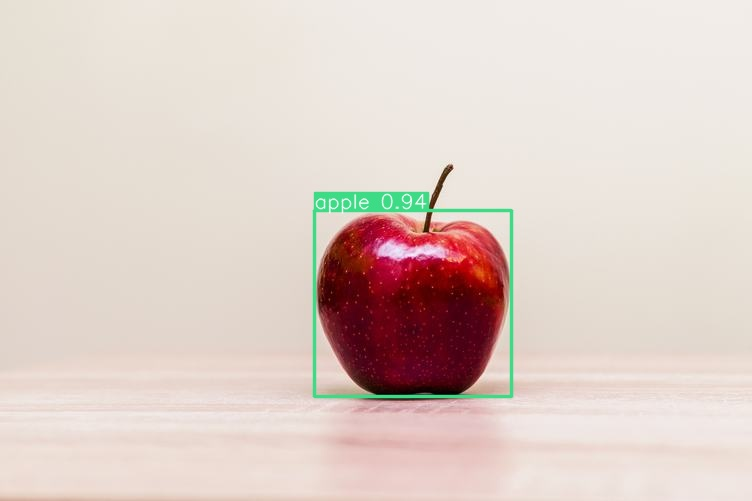

In [12]:
import cv2
from ultralytics import YOLO
from IPython.display import Image

# Load the pre-trained YOLOv8 model
model = YOLO('yolov8n')  # This will automatically download the model weights

# Perform inference
source_img = cv2.imread('/content/apple-single-red.jpg')
results = model(source_img)

# Visualize the results on the frame
annotated_frame = results[0].plot()

# Guardamos el resultado en JPG
cv2.imwrite('apple.jpg', annotated_frame)

# Mostramos el resultado en Colab
Image('apple.jpg')